# Tensors and Images

## Tensors as Pixels

Create a color gradient image as a rank two tensor of `U4`.

In [1]:
grad := With(
    dim: 256,
    red: Range(dim)->CastU4()->Tensor.From(1, dim),
    grn: (Range(dim) shl 8)->CastU4()->Tensor.From(dim, 1),
    red bor grn);
grad->GetType();
grad.Shape;

u4[*,*]
(256, 256)



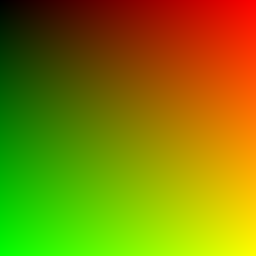

In [2]:
grad

Create the same as a rank three tensor of `U1`.

In [3]:
grad2 := With(
    dim: 256,
    red: Range(dim)->CastU1()->Tensor.From(4, 1, dim)->Transpose(1, 2, 0),
    grn: (Repeat(0, dim) ++ Range(dim))->CastU1()->Tensor.From(4, dim, 1)->Transpose(1, 2, 0),
    red bor grn);
grad2->GetType();
grad2.Shape;

u1[*,*,*]
(256, 256, 4)



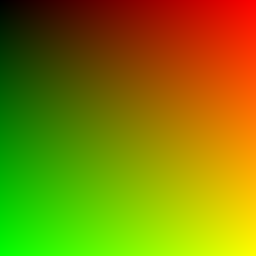

In [4]:
grad2

## Loading pixels from files

In [5]:
image := ReadPixels(
    "https://upload.wikimedia.org/wikipedia/commons/6/66/Polar_Bear_-_Alaska_%28cropped%29.jpg");
image.Shape;

(565, 563, 4)



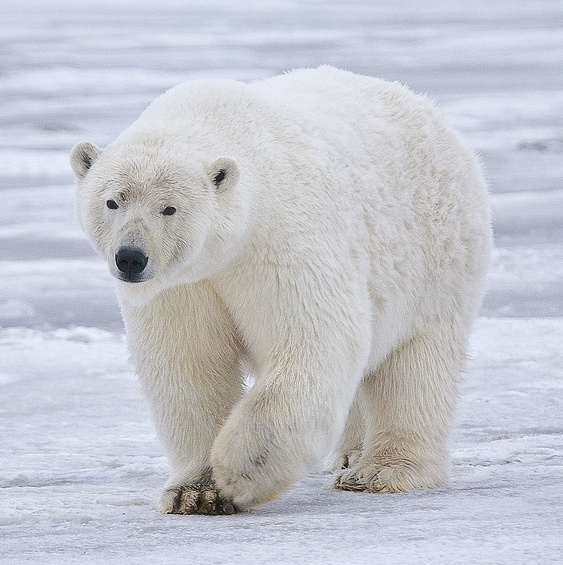

In [6]:
image

## Transforming pixels

### Flip


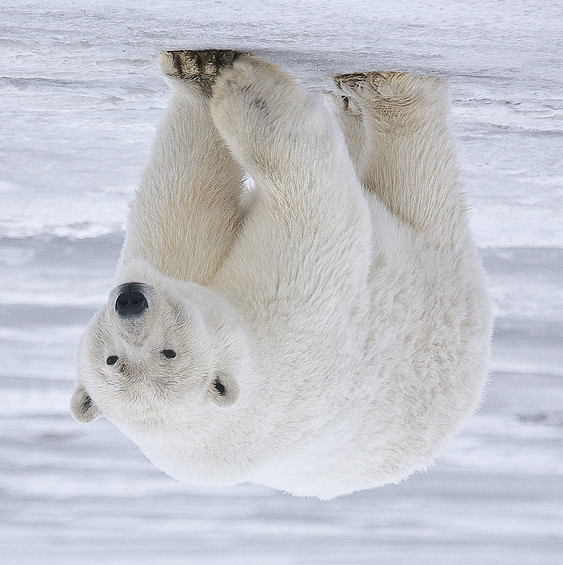

In [7]:
image[::-1]


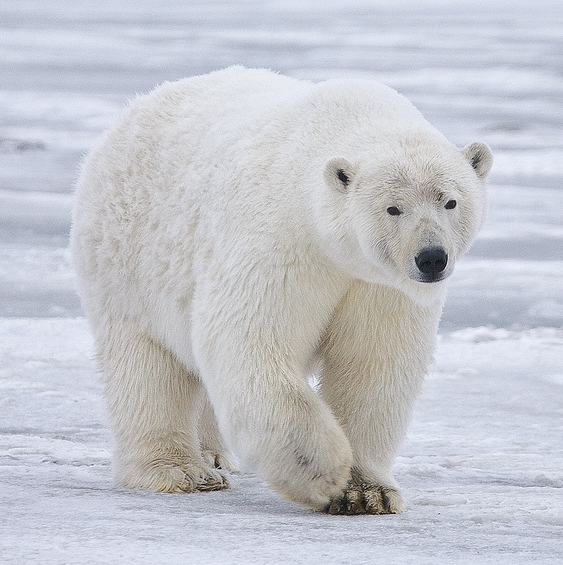

In [8]:
image[:, ::-1]


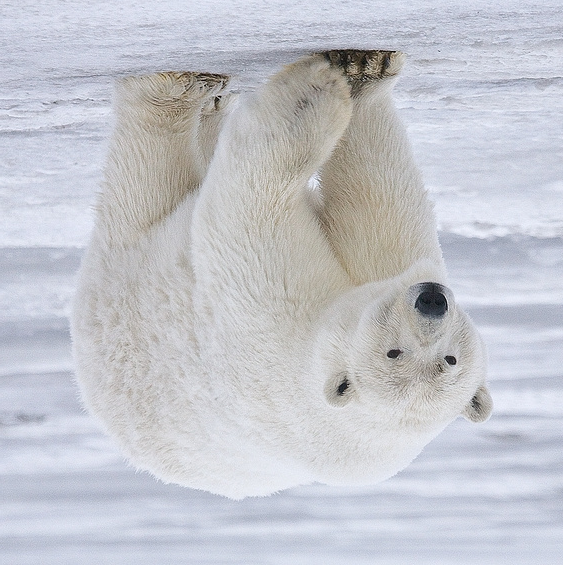

In [9]:
image[::-1, ::-1]

### Rotate


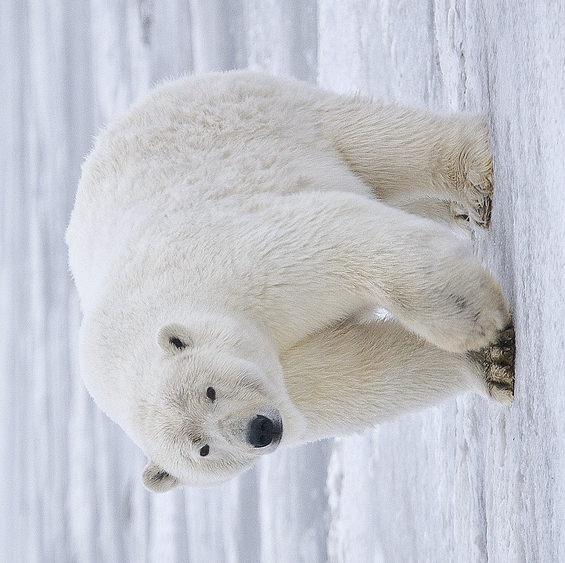

In [10]:
image->Transpose(1, 0, 2)[::-1]

### Crop


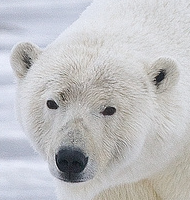

In [11]:
image[100:300, 60:250]

### I like that! Save it!

In [12]:
finish W as WritePng(image[100:300, 60:250], "polar_bear_face.png");
(W$Failed, W$ResultNames);
W.Size;

(false, (Link, FullLink, ByteCount, Size))
73929


### Resize - isotropic


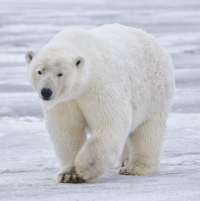

In [13]:
image->ResizePixels(200)

### Resize - anisotropic


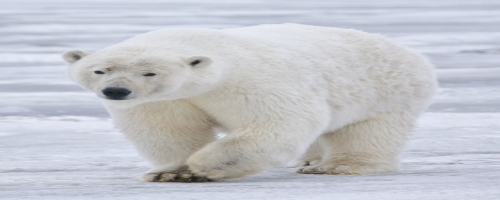

In [14]:
image->ResizePixels(200, 500)